# Homework 5

## 1. Data

First, since the dataset is really large, we try to read just some of the rows to see which are the columns and how the information are stored. In this way we will know which columns are necessary to take for the ceration of the Citation Graph and Collaboration Graph.

In [1]:
import ijson
import pandas as pd

#Initializing an empty list to store data
data_short = []

#Opening the JSON file for reading in binary mode
with open(r"dblp.v12.json", "rb") as file:
    #Using ijson library to parse JSON items from the file
    objects = ijson.items(file, "item")

    #Iterating over the items in the JSON file
    for i, obj in enumerate(objects):
        #Break the loop after processing 1000 items (change as needed)
        if i == 1000:
           break

        #Appending the current JSON item to the data list
        data_short.append(obj)

df_short = pd.DataFrame(data_short)

Now we visualize the riducted dataset.

In [2]:
df_short

,id,authors,title,year,n_citation,page_start,page_end,doc_type,publisher,volume,issue,doi,references,indexed_abstract,fos,venue
0,1091,"[{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...",Preliminary Design of a Network Protocol Learn...,2013,1,89,93,Conference,"Springer, Berlin, Heidelberg",,,10.1007/978-3-642-39476-8_19,"[2005687710, 2018037215]","{'IndexLength': 58, 'InvertedIndex': {'tool.':...","[{'name': 'Telecommunications network', 'w': 0...",{'raw': 'International Conference on Human-Com...
1,1388,"[{'name': 'Pranava K. Jha', 'id': 2718958994}]",Further Results on Independence in Direct-Prod...,2000,1,,,Journal,,56,,,NaN,NaN,"[{'name': 'Graph', 'w': 0.0}, {'name': 'Discre...","{'raw': 'Ars Combinatoria', 'id': 73158690, 't..."
2,1674,"[{'name': 'G. Beale', 'org': 'Archaeological C...",A methodology for the physically accurate visu...,2011,1,137,144,Conference,Eurographics Association,,,10.2312/VAST/VAST11/137-144,"[1535888970, 1992876689, 1993710814, 203565334...","{'IndexLength': 201, 'InvertedIndex': {'illust...","[{'name': 'Statue', 'w': 0.40216}, {'name': 'E...",{'raw': 'International Conference on Virtual R...
3,1688,"[{'name': 'Altaf Hossain', 'org': 'Department ...","Comparison of GARCH, Neural Network and Suppor...",2009,6,597,602,Conference,"Springer, Berlin, Heidelberg",,,10.1007/978-3-642-11164-8_97,"[1560724230, 1986968751, 2156909104]","{'IndexLength': 64, 'InvertedIndex': {'standar...",[{'name': 'Autoregressive–moving-average model...,{'raw': 'Pattern Recognition and Machine Intel...
4,5411,"[{'name': 'Rafael Álvarez', 'id': 2125293936},...",COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,2009,0,99,102,Conference,,,,,NaN,NaN,"[{'name': 'Computer vision', 'w': 0.44692}, {'...",{'raw': 'International Conference on Computer ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,875054,"[{'name': 'Maazen Alsabaan', 'org': 'Universit...",Geocast Routing in Vehicular Networks for Redu...,2011,7,26,40,Conference,"Springer, Berlin, Heidelberg",,,10.1007/978-3-642-23447-7_4,"[2101963262, 2136758263, 2144113407, 216268564...","{'IndexLength': 201, 'InvertedIndex': {'been':...","[{'name': 'Global warming', 'w': 0.4402}, {'na...",{'raw': 'International Conference on Informati...
996,875060,"[{'name': 'Frank Wolter', 'org': 'Institut für...",Spatial reasoning in RCC-8 with Boolean region...,2000,53,244,248,Conference,IOS Press,,,,"[852874, 1525985171, 1551609000, 1568262744, 1...","{'IndexLength': 90, 'InvertedIndex': {'but': [...","[{'name': 'Spatial intelligence', 'w': 0.49212...",{'raw': 'European Conference on Artificial Int...
997,876431,"[{'name': 'Apostolos P. Fournaris', 'org': 'Un...",Trust Management Through Hardware Means: Desig...,2011,7,31,45,Conference,"Springer, Dordrecht",,,10.1007/978-94-007-1488-5_3,"[118467740, 1730333074, 1881737672, 1969042806...","{'IndexLength': 210, 'InvertedIndex': {'very':...","[{'name': 'Trusted third party', 'w': 0.53136}...",{'raw': 'IEEE Computer Society Annual Symposiu...
998,876610,"[{'name': 'Hans H. K. Andersen', 'id': 2132304...",Evaluation of an e-commerce Agent.,2002,0,64,70,Conference,,,,,NaN,NaN,"[{'name': 'Commerce', 'w': 0.39993}, {'name': ...",{'raw': 'International Conference on Artificia...


As we can see we have 16 columns and we are interested in particular in: "id", "authors", "n_citation" and "references". Since the file is really large, we take just some of the columns and we also add the following columns to have complete information: "title", "doc_type" and "doi".

In [ ]:
import ijson
import pandas as pd
import numpy as np


#Path of the file
json_file_path = r"dblp.v12.json"

#Initializing the DATA variable
DATA = [] 
with open(json_file_path, "rb") as file:
    objects = ijson.items(file, "item")
    for i, element in enumerate(objects):
        data = {}

        #Extracting 'id' from the element
        data['id'] = element['id']

        #Extracting 'authors' from the element
        authors = element.get('authors', {})
        data['authors'] = authors


        #Extracting 'title' from the element
        data['title'] = element['title']

        #Extracting 'year' from the element or set to NaN if not present
        year = element.get('year')
        data['year'] = year if year else np.nan

        #Extracting 'n_citation' from the element or set to 0 if not present
        n_citation = element.get('n_citation')
        data['n_citation'] = element['n_citation'] if n_citation else 0

        #Extracting 'doc_type' from the element or set to NaN if not present
        doc_type = element.get('doc_type')
        data['doc_type']= element['doc_type'] if doc_type else np.nan

        #Extracting 'references' from the element, join them with ';' if present, or set to NaN if not present
        references = element.get('references')
        data['references'] = ';'.join([str(int(r)) for r in references]) if references else np.nan
        
        #Appending the extracted data to the DATA list
        DATA.append(data)

#Creating the dataframe
df = pd.DataFrame(DATA)


Now we visualize the dataset.

In [2]:
df

,id,authors,title,year,n_citation,doc_type,references,doi
0,1091,"[{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...",Preliminary Design of a Network Protocol Learn...,2013.0,1,Conference,2005687710;2018037215,https://doi.org/10.1007/978-3-642-39476-8_19
1,1388,"[{'name': 'Pranava K. Jha', 'id': 2718958994}]",Further Results on Independence in Direct-Prod...,2000.0,1,Journal,NaN,NaN
2,1674,"[{'name': 'G. Beale', 'org': 'Archaeological C...",A methodology for the physically accurate visu...,2011.0,1,Conference,1535888970;1992876689;1993710814;2035653341;20...,https://doi.org/10.2312/VAST/VAST11/137-144
3,1688,"[{'name': 'Altaf Hossain', 'org': 'Department ...","Comparison of GARCH, Neural Network and Suppor...",2009.0,6,Conference,1560724230;1986968751;2156909104,https://doi.org/10.1007/978-3-642-11164-8_97
4,5411,"[{'name': 'Rafael Álvarez', 'id': 2125293936},...",COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,2009.0,0,Conference,NaN,NaN
...,...,...,...,...,...,...,...,...
4894076,99905544,"[{'name': 'S. Nandagopalan', 'org': 'Dept. of ...",A Naïve-Bayesian methodology to classify echo ...,2010.0,2,Conference,1562217771;1625504505;2015022770;2108751703;21...,https://doi.org/10.1007/978-3-642-24788-0_15
4894077,99884553,"[{'name': 'Koen Cornelis Hubertus Blom', 'org'...",Blind Equalization for underwater communications,2014.0,0,NaN,NaN,https://doi.org/10.3990/1.9789036536806
4894078,999847014,"[{'name': 'Gert Læssøe Mikkelsen', 'org': 'Ale...",Technical Implementation and Feasibility,2015.0,1,NaN,1940933138;1975620021;1978183200;2097595927;21...,https://doi.org/10.1007/978-3-319-14439-9_9
4894079,9990887,"[{'name': 'Rajesh Natarajan', 'org': 'Indian I...",Knowledge Patterns in Databases,2011.0,0,NaN,NaN,https://doi.org/10.4018/978-1-59904-931-1.ch081


We can see that there are a lot of NaNs, so we delete the NaNs from the columns 'id', 'authors', 'references'.

In [35]:
#Eliminating NaNs values
df = df.dropna(subset=['id'])
df = df.dropna(subset=['authors'])
df = df.dropna(subset=['references'])

#Eliminating the duplicates from the column 'id'
df = df.drop_duplicates(subset=['id'])

In [36]:
#Visualizing the new dataset
df

,id,authors,title,year,n_citation,doc_type,references,doi
0,1091,"[{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...",Preliminary Design of a Network Protocol Learn...,2013.0,1,Conference,2005687710;2018037215,https://doi.org/10.1007/978-3-642-39476-8_19
2,1674,"[{'name': 'G. Beale', 'org': 'Archaeological C...",A methodology for the physically accurate visu...,2011.0,1,Conference,1535888970;1992876689;1993710814;2035653341;20...,https://doi.org/10.2312/VAST/VAST11/137-144
3,1688,"[{'name': 'Altaf Hossain', 'org': 'Department ...","Comparison of GARCH, Neural Network and Suppor...",2009.0,6,Conference,1560724230;1986968751;2156909104,https://doi.org/10.1007/978-3-642-11164-8_97
6,6522,"[{'name': 'Güzin Ulutas', 'org': 'Karadeniz Te...",Improved Secret Image Sharing Method By Encodi...,2011.0,0,Conference,2007942710;2040446335;2042901705;2138296484,https://doi.org/10.1007/978-1-4471-2155-8_42
8,8373,"[{'name': 'Phan Cong Vinh', 'org': 'Department...",Formal agent-oriented ubiquitous computing: a ...,2012.0,0,Conference,141500162;1977736041;2057072261;2495388083;261...,https://doi.org/10.1007/978-3-642-28490-8_52
...,...,...,...,...,...,...,...,...
4894073,999545449,"[{'name': 'Zaiwu Gong', 'org': 'School of Econ...",Consensus modeling with nonlinear utility and ...,2015.0,18,Journal,97170299;1848568749;1969696992;1972529917;1973...,https://doi.org/10.1016/j.knosys.2015.07.031
4894075,998513720,"[{'name': 'Jian Yu', 'id': 2517449035}]",Communication: Words and Conceptual Systems.,2015.0,0,Repository,2124479173;2242142378;2912565176,NaN
4894076,99905544,"[{'name': 'S. Nandagopalan', 'org': 'Dept. of ...",A Naïve-Bayesian methodology to classify echo ...,2010.0,2,Conference,1562217771;1625504505;2015022770;2108751703;21...,https://doi.org/10.1007/978-3-642-24788-0_15
4894078,999847014,"[{'name': 'Gert Læssøe Mikkelsen', 'org': 'Ale...",Technical Implementation and Feasibility,2015.0,1,NaN,1940933138;1975620021;1978183200;2097595927;21...,https://doi.org/10.1007/978-3-319-14439-9_9


We now store the new dataframe in a csv file to simplify future reading of the dataset

In [6]:
df.to_csv('df_csv.csv', index=False)

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#Read the CSV file into a DataFrame
df = pd.read_csv('df_csv.csv')

In [3]:
df.head()

,id,authors,title,year,n_citation,doc_type,references
0,1091,"[{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...",Preliminary Design of a Network Protocol Learn...,2013.0,1,Conference,2005687710;2018037215
1,1674,"[{'name': 'G. Beale', 'org': 'Archaeological C...",A methodology for the physically accurate visu...,2011.0,1,Conference,1535888970;1992876689;1993710814;2035653341;20...
2,1688,"[{'name': 'Altaf Hossain', 'org': 'Department ...","Comparison of GARCH, Neural Network and Suppor...",2009.0,6,Conference,1560724230;1986968751;2156909104
3,6522,"[{'name': 'Güzin Ulutas', 'org': 'Karadeniz Te...",Improved Secret Image Sharing Method By Encodi...,2011.0,0,Conference,2007942710;2040446335;2042901705;2138296484
4,8373,"[{'name': 'Phan Cong Vinh', 'org': 'Department...",Formal agent-oriented ubiquitous computing: a ...,2012.0,0,Conference,141500162;1977736041;2057072261;2495388083;261...


Now we sort the dataset based on the number of citation to select the top 10000 papers with the highest number of citations.

In [4]:
import ast

#Sorting the DataFrame based on the number of citations in descending order
df_sorted = df.sort_values(by='n_citation', ascending=False)

#Selecting the top 10,000 papers from the sorted DataFrame
sub_df = df_sorted.head(10000)

# Transforn the value of column 'authors' into a list of dictionaries
sub_df['authors'] = sub_df['authors'].apply(ast.literal_eval) 

In [5]:
#Visualizing the selected dataset
sub_df.head()

,id,authors,title,year,n_citation,doc_type,references
2446184,2151103935,"[{'name': 'David G. Lowe', 'org': 'Computer Sc...",Distinctive Image Features from Scale-Invarian...,2004.0,35541,Journal,19720318;1541642243;1560959218;1676552347;1681...
3298201,2911964244,"[{'name': 'Leo Breiman', 'org': 'Statistics De...",Random Forests,2001.0,34741,NaN,1507255258;1580948147;1605688901;1975846642;20...
2225037,2153635508,"[{'name': 'Chih-Chung Chang', 'org': 'National...",LIBSVM: A library for support vector machines,2011.0,31047,Journal,1510526001;1543810117;1556115774;1568793342;16...
502478,1791587663,"[{'name': 'Fred D. Davis', 'org': 'Computer an...","Perceived usefulness, perceived ease of use, a...",1989.0,25855,Journal,157213131;1520103841;1778357938;1972888601;197...
1880225,2119821739,"[{'name': 'Corinna Cortes', 'org': 'AT&T Bell ...",Support-Vector Networks,1995.0,22276,Journal,2087347434;2154579312;2168228682


We can create the Citation Graph following the task: considering the reduced dataset of the top 10000 papers that we call `sub_df`, the nodes are the papers of this dataset and the edges are the citations of it.
This graph is direct and unweighted.

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

#Initializing a directed Multigraph
citation_graph = nx.DiGraph()

#Creating a set of IDs from our new DataFrame
df_ids_set = set(sub_df['id'])

# Adding nodes to the graph based on the set of ids
for node_id in df_ids_set:
    citation_graph.add_node(int(node_id))

#Iterating over the top 10,000 papers in the reduced DataFrame (sub_df) and add edges
for index, paper in sub_df.iterrows():
    #Splitting references and remove leading/trailing whitespaces
    if pd.notna(paper['references']):
        references = paper['references'].split(';')
        references = [int(ref.strip()) for ref in references if ref] # create a list of int corrisponding to the paper ids referenced by the current paper

        # Add the edge between current node and referenced nodes only if the referenced node is contained in our subset of the original dataframe
        citation_graph.add_edges_from([(paper['id'], ref) for ref in references if ref in df_ids_set])


In [7]:
print("number of nodes:", citation_graph.number_of_nodes())
print("number of edges:", citation_graph.number_of_edges())

number of nodes: 10000
number of edges: 55189


The other type of graph is the Collaboration Graph. Here, the nodes are the authors and the edges are the collaborations between the authors of the top 10000 papers.
Since the column 'authors' is composed by a dictionaries with general information about the authors, we create a function that takes just the name of the author.

In [8]:
def extract_authors(authors_list):
    #Extracting author names from a list of author information
    author_names = []
    for author_info in authors_list:
        if 'name' in author_info:
            author_names.append(author_info['name'])
    return author_names


In [9]:
#Applying the extraction function to authors in the extracted DataFrame
sub_df['author_names'] = sub_df['authors'].apply(extract_authors)

In [10]:
sub_df['author_names'].head(10)

2446184                                  [David G. Lowe]
3298201                                    [Leo Breiman]
2225037                 [Chih-Chung Chang, Chih-Jen Lin]
502478                                   [Fred D. Davis]
1880225                [Corinna Cortes, Vladimir Vapnik]
1712348                        [Heng Li, Richard Durbin]
1944406    [K. Deb, A. Pratap, S. Agarwal, T. Meyarivan]
2147920          [Fredrik Ronquist, John P. Huelsenbeck]
2137581                                     [John Canny]
2310011                            [N. Dalal, B. Triggs]
Name: author_names, dtype: object

Now we can implement the Collaboration Graph.

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

#Creating an undirected and weighted graph
collaboration_graph = nx.Graph()

#Iterating over the top 10,000 papers in the reduced DataFrame (sub_df)
for index, paper in sub_df.iterrows():
    
    #Adding authors as nodes to the graph
    collaboration_graph.add_nodes_from(paper['author_names'])


    # Adding weighted edges between authors (all combinations)
    author_pairs = itertools.combinations(paper['author_names'], 2)  # generates combinations of size 2 without repetition
    
    for author1, author2 in author_pairs:

        if collaboration_graph.has_edge(author1, author2):
            # Adding weight if the edge already exists
            collaboration_graph[author1][author2]['weight'] += 1
            # Adding paper ID to the list of papers
            collaboration_graph[author1][author2]['papers'].append(paper['id'])
        else:
            # Creating a new edge with weight 1 and a list of paper IDs
            collaboration_graph.add_edge(author1, author2, weight=1, papers=[paper['id']])
    


In [22]:
print("number of nodes:", collaboration_graph.number_of_nodes())
print("number of edges:", collaboration_graph.number_of_edges())

number of nodes: 23742
number of edges: 144827


In [32]:
# Visualize the structure of one node in the collaboration_graph
edge_attributes = collaboration_graph['David G. Lowe']['Marius Muja']
print(edge_attributes)


{'weight': 2, 'papers': [1627400044, 2086504823]}


## 2. Controlling system

### 2.1. Backend Implementation

#### Functionality 1 - Graph's features
This function should examine a graph and report on some of its features. The input and report that this function should produce are shown below.

Input:
- The graph
- The name of the graph

Output:
- The number of the nodes in the graph
- The number of the edges in the graph
- The graph density
- The graph degree distribution
- The average degree of the graph
- The graph hubs (hubs are nodes having degrees more extensive than the 95th percentile of the degree distribution)
- Whether the graph is dense or sparse

In [153]:
import networkx as nx
import numpy as np

def functionality_1(graph, graph_name):

    # Use assert to check if the graph name is "citations" or "collaborations"
    assert graph_name == "citation_graph" or graph_name == "collaboration_graph", "choose 'citation_graph' or 'collaboration_graph' as second input value"
    
    # compute the number of NODES 
    num_nodes = graph.number_of_nodes()

    # compute the number of EDGES
    num_edges = graph.number_of_edges()

    # compute the DENSITY of the graph (use networkx so we don't have to distinguish if the graph is directed or undirected)
    density = nx.density(graph)

    # compute the DEGREE DISTRIBUTION
    if graph_name == "collaboration_graph":
        degree_distribution = nx.degree_histogram(graph) # use the predefined method
        
    else: # the graph is directed
        in_degrees = dict(graph.in_degree()) # create a dictionary of nodes as keys and in-degree as values
        out_degrees = dict(graph.out_degree()) # create a dictionary of nodes as keys and out-degree as values

        # initialize two empty list to create the histograms
        indegree_distribution = np.zeros(max(in_degrees.values())+1)
        outdegree_distribution = np.zeros(max(out_degrees.values())+1)

        for degree in in_degrees.values():
            indegree_distribution[degree] += 1
        
        for degree in out_degrees.values():
            outdegree_distribution[degree] += 1
        
        degree_distribution = (indegree_distribution, outdegree_distribution)


    # compute the AVERAGE DEGREE
    node_degrees = dict(graph.degree()) # create a dictionary where the key is the node and the value is its degree
    average_degree = sum(node_degrees.values()) / num_nodes # sum up all the degrees and divide by number of nodes

    # compute the GRAPH HUBS 
    node_degrees = dict(graph.degree()) # create a dictionary where the key is the node and the value is its degree
    # calculate the 95th percentil of the degree distribution
    degree_values = list(node_degrees.values())
    percentile_95 = np.percentile(degree_values, 95)
    # find Hubs
    hubs = [node for node, degree in node_degrees.items() if degree > percentile_95]

    # compute wheter the graph is DENSE or SPARSE
    threshold = 0.5 # we use the following convention: if the density is less than the chosen threshold the graph is sparse, otherwise is dense
    if density <= threshold:
        sparse_or_dense = "sparse"
    else:
        sparse_or_dense = "dense"

    return(graph_name, num_nodes, num_edges, density, degree_distribution, average_degree, hubs, sparse_or_dense)

#### Functionality 2 - Nodes' contribution
Using this functionality, you will identify the papers/authors who have significantly contributed to this field of study. For this analysis, focusing solely on the number of citations for the paper or the number of collaborations of the authors can be misleading. You will examine this using various centrality measurements.

Input:
- The graph
- A node of the graph (paper/author)
- The name of the graph

Output:
The centrality of the node, calculated based on the following centrality measurements:
- Betweeness
- PageRank
- ClosenessCentrality
- DegreeCentrality

In [141]:
def functionality_2(graph, node, graph_name):

    # Use assert to check if the graph name is "citations" or "collaborations"
    assert graph_name == "citation_graph" or graph_name == "collaboration_graph", "choose 'citation_graph' or 'collaboration_graph' as second input value"

    # Use assert to check if the node is a node of the graph
    assert node in graph.nodes, f"The node {node} is not in the graph"

    # Betweenness Centrality
    betweenness_centrality = nx.betweenness_centrality(graph)[node]

    # PageRank Centrality
    pagerank_centrality = nx.pagerank(graph)[node]

    # Closeness Centrality
    closeness_centrality = nx.closeness_centrality(graph)[node]

    # Degree Centrality
    degree_centrality = nx.degree_centrality(graph)[node]

    return (node, graph_name, betweenness_centrality, pagerank_centrality, closeness_centrality, degree_centrality)

### 2.2. Frontend Implementation

#### Visualization 1 - Visualize graph features

In [154]:
# Create an empty DataFrame to store the informations
columns = ["Graph Name", "# Nodes", "# Edges", "Density", "Average Degree", "Type"]
table1 = pd.DataFrame(columns=columns)

# call the functionality1 to retrive the required informations
cit_name, cit_nodes, cit_edges, cit_density, cit_degree_distribution, cit_average_degree, cit_hubs, cit_type = functionality_1(citation_graph, "citation_graph")
col_name, col_nodes, col_edges, col_density, col_degree_distribution, col_average_degree, col_hubs, col_type = functionality_1(collaboration_graph, "collaboration_graph")

# fill the table 
table1 = table1.append({
    "Graph Name": cit_name,
    "# Nodes": cit_nodes,
    "# Edges": cit_edges,
    "Density": cit_density,
    "Average Degree": cit_average_degree,
    "Type": cit_type
}, ignore_index=True)

table1 = table1.append({
    "Graph Name": col_name,
    "# Nodes": col_nodes,
    "# Edges": col_edges,
    "Density": col_density,
    "Average Degree": col_average_degree,
    "Type": col_type
}, ignore_index=True)

# Set "Graph Name" as the index
table1.set_index("Graph Name", inplace=True)

table1


,# Nodes,# Edges,Density,Average Degree,Type
Graph Name,,,,,
citation_graph,10000,55189,0.000552,11.037800,sparse
collaboration_graph,23742,144827,0.000514,12.200067,sparse


In [155]:
# Create a new Dataframe
df_cit_hubs = pd.DataFrame(columns=['Citation Graph Hubs'])

# Fill the dataframe with graph's hubs
df_cit_hubs['Citation Graph Hubs'] = cit_hubs

# show dataframe
df_cit_hubs

,Citation Graph Hubs
0,2124087378
1,2130509920
2,2107080958
3,2121531691
4,2167898414
...,...
453,2155904486
454,2163605009
455,2101771805
456,2147253850


In [156]:
# Create a new Dataframe
df_col_hubs = pd.DataFrame(columns=['Collaboration Graph Hubs'])

# Fill the dataframe with graph's hubs
df_col_hubs['Collaboration Graph Hubs'] = col_hubs

# show dataframe
df_col_hubs

,Collaboration Graph Hubs
0,Richard Durbin
1,Andrew Y. Ng
2,Ilya Sutskever
3,Jeffrey Dean
4,Sanjay Ghemawat
...,...
1183,G. Soza
1184,R. Susomboon
1185,J.M. Waite
1186,A. Wimmer


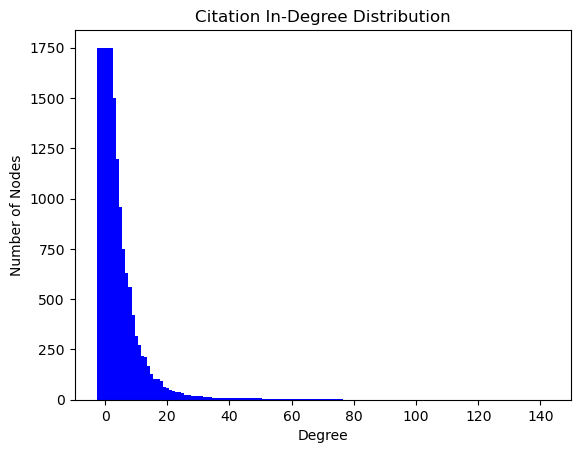

In [171]:
# Plot Degree Distribution
plt.bar(range(len(cit_degree_distribution[0])), cit_degree_distribution[0], width=5.0, color='b')
plt.title('Citation In-Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.show()

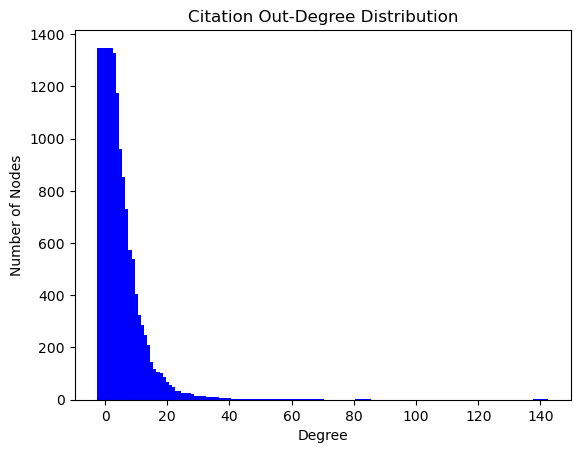

In [170]:
# Plot Degree Distribution
plt.bar(range(len(cit_degree_distribution[1])), cit_degree_distribution[1], width=5.0, color='b')
plt.title('Citation Out-Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.show()

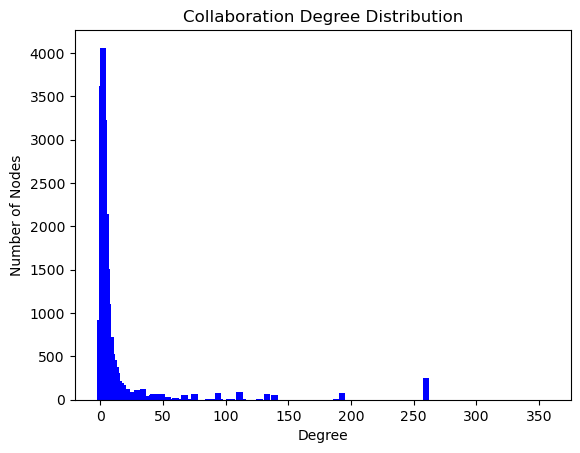

In [169]:
# Plot Degree Distribution
plt.bar(range(len(col_degree_distribution)), col_degree_distribution, width=5.0, color='b')
plt.title('Collaboration Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.show()

#### Visualization 2 - Visualize the node's contribution

In [172]:
# Create an empty DataFrame to store the informations
columns = ["Node", "Graph Name", "Betweenness Centrality", "Pagerank Centrality", "Closeness Centrality", "Degree Centrality"]
table2 = pd.DataFrame(columns=columns)

# call the functionality1 to retrive the required informations
node, name, betweenness_centrality, pagerank_centrality, closeness_centrality, degree_centrality = functionality_2(citation_graph, 2124087378, 'citation_graph')

# fill the table 
table2 = table2.append({
    "Node": node,
    "Graph Name": name,
    "Betweenness Centrality": betweenness_centrality,
    "Pagerank Centrality": pagerank_centrality,
    "Closeness Centrality": closeness_centrality,
    "Degree Centrality": degree_centrality,
}, ignore_index=True)

# Set "Node" as the index
table2.set_index("Node", inplace=True)

table2

,Graph Name,Betweenness Centrality,Pagerank Centrality,Closeness Centrality,Degree Centrality
Node,,,,,
2124087378,citation_graph,0.00023,0.000445,0.032208,0.0038
